# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 2

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_9L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_21L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
   'D:\\Users\\Chuan\\Document

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  2
chr_09
   Train: 
        193002-9p12q13_11L.bmp
        193002-9p12q13_12L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_1L.bmp
        193002-9p12q13_24L.bmp
        193002-9p12q13_2L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_7L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_14L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_19L.bmp
        W07391-9p12q_1L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_22L.bmp
        W07391-9p12q_2L.bmp
        W07391-9p12q_3L.bmp
        W07391-9p12q_4L.bmp
        W07391-9p12q_6L.bmp
        W07391-9p12q_

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

346

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
6/6 [==============================] - 6s 516ms/step - loss: 1936.3634 - accuracy: 0.4855 - val_loss: 56.7070 - val_accuracy: 0.5977
Epoch 2/500
6/6 [==============================] - 1s 114ms/step - loss: 22.4414 - accuracy: 0.5231 - val_loss: 0.8477 - val_accuracy: 0.5977
Epoch 3/500
6/6 [==============================] - 1s 113ms/step - loss: 1.2544 - accuracy: 0.7023 - val_loss: 0.3766 - val_accuracy: 0.8276
Epoch 4/500
6/6 [==============================] - 1s 112ms/step - loss: 0.2929 - accuracy: 0.8699 - val_loss: 0.4606 - val_accuracy: 0.7701
Epoch 5/500
6/6 [==============================] - 1s 111ms/step - loss: 0.3157 - accuracy: 0.8786 - val_loss: 0.4456 - val_accuracy: 0.8046
Epoch 6/500
6/6 [==============================] - 1s 114ms/step - loss: 0.1589 - accuracy: 0.9306 - val_loss: 0.3690 - val_accuracy: 0.8621
Epoch 7/500
6/6 [==============================] - 1s 113ms/step - loss: 0.1315 - accuracy: 0.9624 - val_loss: 0.4438 - val_accuracy: 0.8391
Epoch 8/

6/6 [==============================] - 1s 127ms/step - loss: 2.4937e-06 - accuracy: 1.0000 - val_loss: 0.5908 - val_accuracy: 0.9080
Epoch 58/500
6/6 [==============================] - 1s 120ms/step - loss: 2.3955e-06 - accuracy: 1.0000 - val_loss: 0.5929 - val_accuracy: 0.9080
Epoch 59/500
6/6 [==============================] - 1s 117ms/step - loss: 2.2828e-06 - accuracy: 1.0000 - val_loss: 0.5948 - val_accuracy: 0.9080
Epoch 60/500
6/6 [==============================] - 1s 117ms/step - loss: 2.1857e-06 - accuracy: 1.0000 - val_loss: 0.5971 - val_accuracy: 0.9080
Epoch 61/500
6/6 [==============================] - 1s 119ms/step - loss: 2.0940e-06 - accuracy: 1.0000 - val_loss: 0.5986 - val_accuracy: 0.9080
Epoch 62/500
6/6 [==============================] - 1s 154ms/step - loss: 1.9959e-06 - accuracy: 1.0000 - val_loss: 0.6001 - val_accuracy: 0.9080
Epoch 63/500
6/6 [==============================] - 1s 116ms/step - loss: 1.9173e-06 - accuracy: 1.0000 - val_loss: 0.6018 - val_accuracy

6/6 [==============================] - 1s 112ms/step - loss: 4.6719e-07 - accuracy: 1.0000 - val_loss: 0.6618 - val_accuracy: 0.8966
Epoch 114/500
6/6 [==============================] - 1s 113ms/step - loss: 4.5754e-07 - accuracy: 1.0000 - val_loss: 0.6628 - val_accuracy: 0.8966
Epoch 115/500
6/6 [==============================] - 1s 111ms/step - loss: 4.5134e-07 - accuracy: 1.0000 - val_loss: 0.6637 - val_accuracy: 0.8966
Epoch 116/500
6/6 [==============================] - 1s 116ms/step - loss: 4.4100e-07 - accuracy: 1.0000 - val_loss: 0.6644 - val_accuracy: 0.8966
Epoch 117/500
6/6 [==============================] - 1s 113ms/step - loss: 4.3273e-07 - accuracy: 1.0000 - val_loss: 0.6651 - val_accuracy: 0.8966
Epoch 118/500
6/6 [==============================] - 1s 115ms/step - loss: 4.2412e-07 - accuracy: 1.0000 - val_loss: 0.6658 - val_accuracy: 0.8966
Epoch 119/500
6/6 [==============================] - 1s 113ms/step - loss: 4.1620e-07 - accuracy: 1.0000 - val_loss: 0.6666 - val_ac

Epoch 169/500
6/6 [==============================] - 1s 117ms/step - loss: 1.9294e-07 - accuracy: 1.0000 - val_loss: 0.6978 - val_accuracy: 0.8966
Epoch 170/500
6/6 [==============================] - 1s 111ms/step - loss: 1.9053e-07 - accuracy: 1.0000 - val_loss: 0.6982 - val_accuracy: 0.8966
Epoch 171/500
6/6 [==============================] - 1s 114ms/step - loss: 1.8777e-07 - accuracy: 1.0000 - val_loss: 0.6987 - val_accuracy: 0.8966
Epoch 172/500
6/6 [==============================] - 1s 120ms/step - loss: 1.8639e-07 - accuracy: 1.0000 - val_loss: 0.6991 - val_accuracy: 0.8966
Epoch 173/500
6/6 [==============================] - 1s 115ms/step - loss: 1.8467e-07 - accuracy: 1.0000 - val_loss: 0.6998 - val_accuracy: 0.8966
Epoch 174/500
6/6 [==============================] - 1s 115ms/step - loss: 1.8295e-07 - accuracy: 1.0000 - val_loss: 0.7003 - val_accuracy: 0.8966
Epoch 175/500
6/6 [==============================] - 1s 116ms/step - loss: 1.7916e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 225/500
6/6 [==============================] - 1s 108ms/step - loss: 1.0405e-07 - accuracy: 1.0000 - val_loss: 0.7234 - val_accuracy: 0.8966
Epoch 226/500
6/6 [==============================] - 1s 111ms/step - loss: 1.0233e-07 - accuracy: 1.0000 - val_loss: 0.7238 - val_accuracy: 0.8966
Epoch 227/500
6/6 [==============================] - 1s 117ms/step - loss: 1.0095e-07 - accuracy: 1.0000 - val_loss: 0.7242 - val_accuracy: 0.8966
Epoch 228/500
6/6 [==============================] - 1s 111ms/step - loss: 9.9915e-08 - accuracy: 1.0000 - val_loss: 0.7246 - val_accuracy: 0.8966
Epoch 229/500
6/6 [==============================] - 1s 116ms/step - loss: 9.8537e-08 - accuracy: 1.0000 - val_loss: 0.7250 - val_accuracy: 0.8966
Epoch 230/500
6/6 [==============================] - 1s 112ms/step - loss: 9.7848e-08 - accuracy: 1.0000 - val_loss: 0.7253 - val_accuracy: 0.8966
Epoch 231/500
6/6 [==============================] - 1s 115ms/step - loss: 9.7503e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 281/500
6/6 [==============================] - 1s 116ms/step - loss: 6.2016e-08 - accuracy: 1.0000 - val_loss: 0.7448 - val_accuracy: 0.8966
Epoch 282/500
6/6 [==============================] - 1s 114ms/step - loss: 6.2016e-08 - accuracy: 1.0000 - val_loss: 0.7452 - val_accuracy: 0.8966
Epoch 283/500
6/6 [==============================] - 1s 111ms/step - loss: 6.1327e-08 - accuracy: 1.0000 - val_loss: 0.7455 - val_accuracy: 0.8966
Epoch 284/500
6/6 [==============================] - 1s 115ms/step - loss: 6.0983e-08 - accuracy: 1.0000 - val_loss: 0.7458 - val_accuracy: 0.8966
Epoch 285/500
6/6 [==============================] - 1s 113ms/step - loss: 6.0983e-08 - accuracy: 1.0000 - val_loss: 0.7461 - val_accuracy: 0.8966
Epoch 286/500
6/6 [==============================] - 1s 113ms/step - loss: 6.0294e-08 - accuracy: 1.0000 - val_loss: 0.7465 - val_accuracy: 0.8966
Epoch 287/500
6/6 [==============================] - 1s 116ms/step - loss: 5.9949e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 337/500
6/6 [==============================] - 1s 114ms/step - loss: 4.1344e-08 - accuracy: 1.0000 - val_loss: 0.7620 - val_accuracy: 0.8966
Epoch 338/500
6/6 [==============================] - 1s 116ms/step - loss: 4.1344e-08 - accuracy: 1.0000 - val_loss: 0.7622 - val_accuracy: 0.8966
Epoch 339/500
6/6 [==============================] - 1s 112ms/step - loss: 4.0655e-08 - accuracy: 1.0000 - val_loss: 0.7625 - val_accuracy: 0.8966
Epoch 340/500
6/6 [==============================] - 1s 114ms/step - loss: 4.0655e-08 - accuracy: 1.0000 - val_loss: 0.7628 - val_accuracy: 0.8966
Epoch 341/500
6/6 [==============================] - 1s 120ms/step - loss: 4.0311e-08 - accuracy: 1.0000 - val_loss: 0.7631 - val_accuracy: 0.8966
Epoch 342/500
6/6 [==============================] - 1s 118ms/step - loss: 4.0311e-08 - accuracy: 1.0000 - val_loss: 0.7634 - val_accuracy: 0.8966
Epoch 343/500
6/6 [==============================] - 1s 114ms/step - loss: 3.9622e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 393/500
6/6 [==============================] - 1s 125ms/step - loss: 2.8596e-08 - accuracy: 1.0000 - val_loss: 0.7766 - val_accuracy: 0.8966
Epoch 394/500
6/6 [==============================] - 1s 114ms/step - loss: 2.8252e-08 - accuracy: 1.0000 - val_loss: 0.7769 - val_accuracy: 0.8966
Epoch 395/500
6/6 [==============================] - 1s 116ms/step - loss: 2.8252e-08 - accuracy: 1.0000 - val_loss: 0.7772 - val_accuracy: 0.8966
Epoch 396/500
6/6 [==============================] - 1s 112ms/step - loss: 2.8252e-08 - accuracy: 1.0000 - val_loss: 0.7774 - val_accuracy: 0.8966
Epoch 397/500
6/6 [==============================] - 1s 113ms/step - loss: 2.8252e-08 - accuracy: 1.0000 - val_loss: 0.7777 - val_accuracy: 0.9080
Epoch 398/500
6/6 [==============================] - 1s 112ms/step - loss: 2.8252e-08 - accuracy: 1.0000 - val_loss: 0.7779 - val_accuracy: 0.8966
Epoch 399/500
6/6 [==============================] - 1s 114ms/step - loss: 2.7907e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 449/500
6/6 [==============================] - 1s 116ms/step - loss: 2.0328e-08 - accuracy: 1.0000 - val_loss: 0.7907 - val_accuracy: 0.9080
Epoch 450/500
6/6 [==============================] - 1s 115ms/step - loss: 2.0328e-08 - accuracy: 1.0000 - val_loss: 0.7909 - val_accuracy: 0.9080
Epoch 451/500
6/6 [==============================] - 1s 113ms/step - loss: 2.0328e-08 - accuracy: 1.0000 - val_loss: 0.7912 - val_accuracy: 0.9080
Epoch 452/500
6/6 [==============================] - 1s 109ms/step - loss: 1.9639e-08 - accuracy: 1.0000 - val_loss: 0.7914 - val_accuracy: 0.9080
Epoch 453/500
6/6 [==============================] - 1s 116ms/step - loss: 1.9639e-08 - accuracy: 1.0000 - val_loss: 0.7916 - val_accuracy: 0.9080
Epoch 454/500
6/6 [==============================] - 1s 115ms/step - loss: 1.8605e-08 - accuracy: 1.0000 - val_loss: 0.7918 - val_accuracy: 0.9080
Epoch 455/500
6/6 [==============================] - 2s 322ms/step - loss: 1.8260e-08 - accuracy: 1.0000 - val_loss: 0

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 9276), started 3:30:08 ago. (Use '!kill 9276' to kill it.)

In [35]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  42.83996067444483  minutes.


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_2\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.908


In [39]:
len(X_test)

87

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

87

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

87

In [44]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
y_predict

array([[1.00000000e+00, 3.08275938e-09],
       [9.99999762e-01, 2.85542569e-07],
       [9.99880672e-01, 7.31691602e-04],
       [1.00000000e+00, 1.55362962e-11],
       [1.00000000e+00, 9.98355087e-09],
       [9.99996662e-01, 3.16940095e-05],
       [1.05979096e-03, 9.99720752e-01],
       [9.99999881e-01, 6.63263222e-08],
       [9.99986172e-01, 1.02259573e-05],
       [1.02102838e-03, 9.99907732e-01],
       [1.00000000e+00, 3.45479090e-10],
       [1.00000000e+00, 3.79325712e-07],
       [9.52719748e-01, 8.23006406e-02],
       [1.00000000e+00, 1.39003342e-09],
       [1.00000000e+00, 2.33010852e-07],
       [1.00000000e+00, 2.52612615e-08],
       [9.99857187e-01, 3.36046534e-04],
       [1.00000000e+00, 6.50612009e-08],
       [9.61451232e-01, 6.52142242e-02],
       [9.99999881e-01, 6.16766513e-08],
       [1.00000000e+00, 1.05204921e-10],
       [9.98654962e-01, 3.20668099e-03],
       [9.99999881e-01, 5.52733042e-08],
       [4.73003477e-01, 7.81084478e-01],
       [1.000000

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.94      0.90      0.92        52
chr_9_inversion       0.86      0.91      0.89        35

      micro avg       0.91      0.91      0.91        87
      macro avg       0.90      0.91      0.91        87
   weighted avg       0.91      0.91      0.91        87



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,47,5
chr_9_inversion,3,32


#### Heat Map

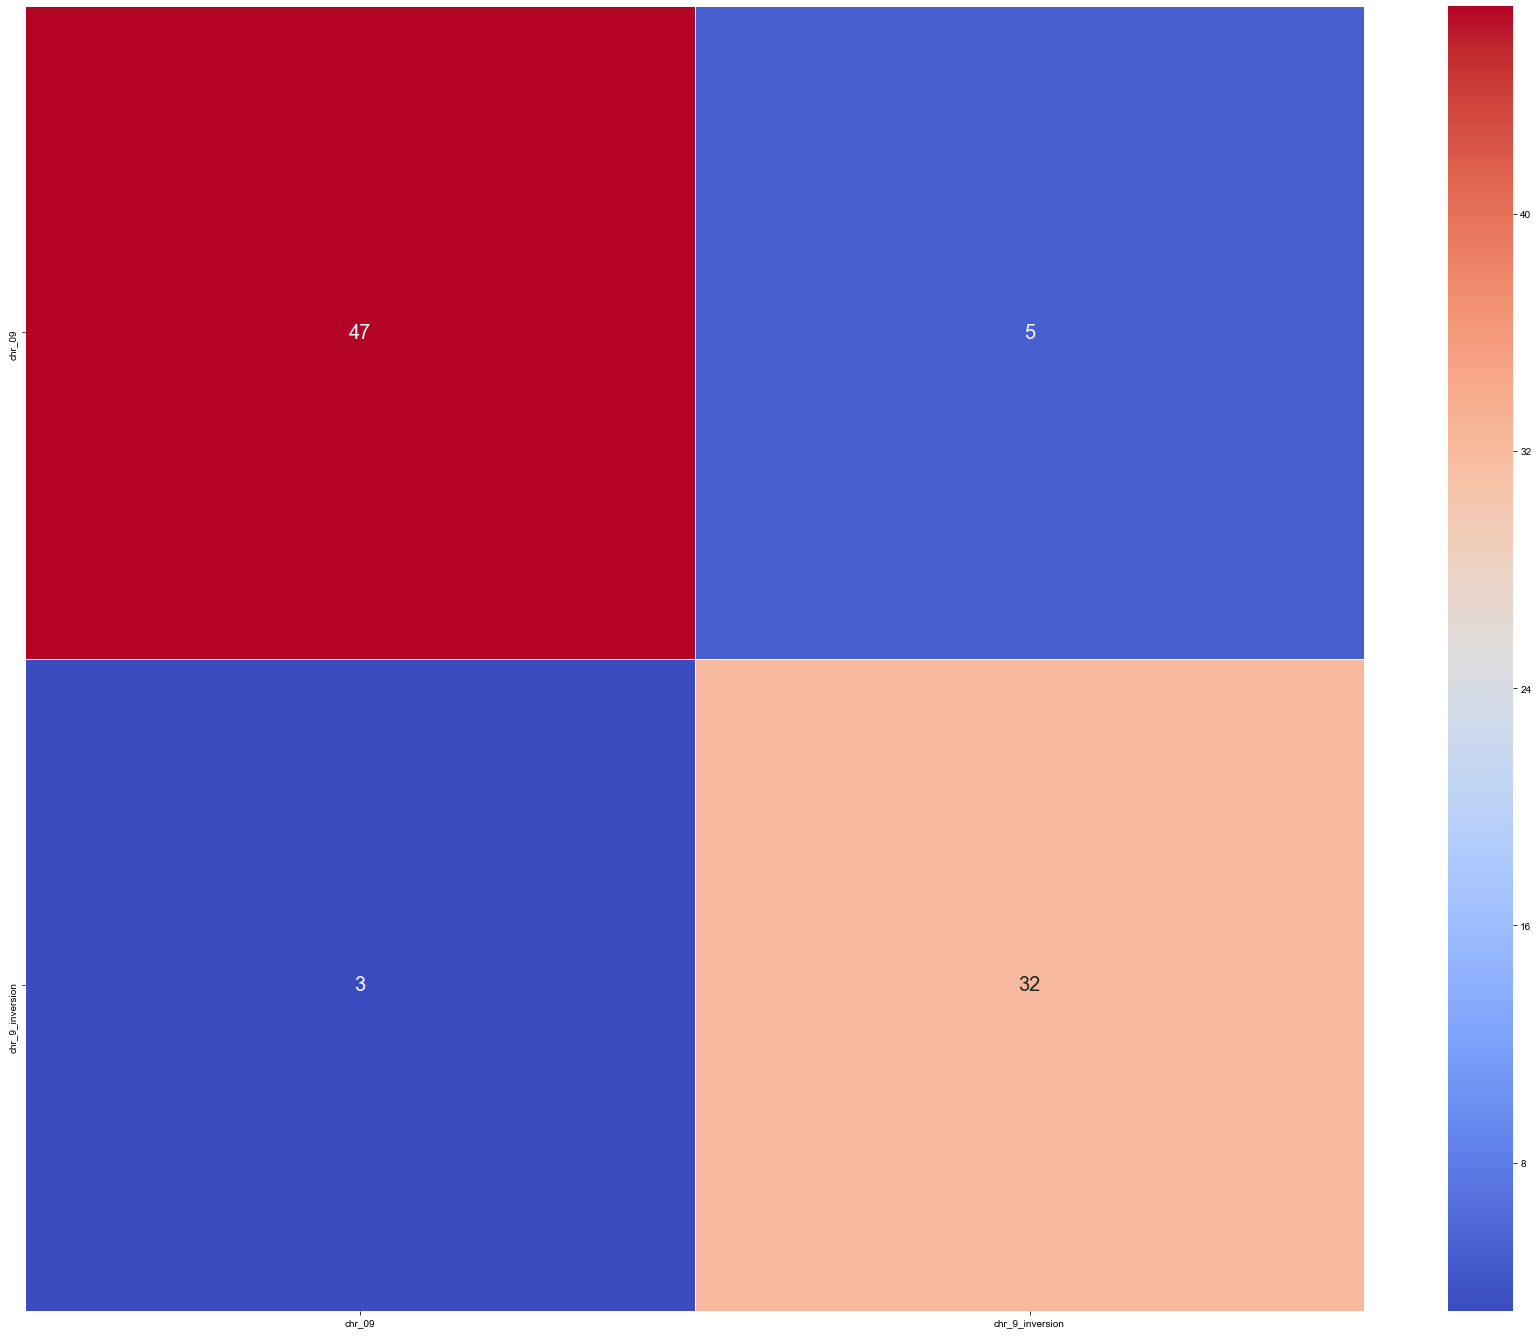

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[1.00000000e+00, 3.08275938e-09],
       [9.99999762e-01, 2.85542569e-07],
       [9.99880672e-01, 7.31691602e-04],
       [1.00000000e+00, 1.55362962e-11],
       [1.00000000e+00, 9.98355087e-09],
       [9.99996662e-01, 3.16940095e-05],
       [1.05979096e-03, 9.99720752e-01],
       [9.99999881e-01, 6.63263222e-08],
       [9.99986172e-01, 1.02259573e-05],
       [1.02102838e-03, 9.99907732e-01],
       [1.00000000e+00, 3.45479090e-10],
       [1.00000000e+00, 3.79325712e-07],
       [9.52719748e-01, 8.23006406e-02],
       [1.00000000e+00, 1.39003342e-09],
       [1.00000000e+00, 2.33010852e-07],
       [1.00000000e+00, 2.52612615e-08],
       [9.99857187e-01, 3.36046534e-04],
       [1.00000000e+00, 6.50612009e-08],
       [9.61451232e-01, 6.52142242e-02],
       [9.99999881e-01, 6.16766513e-08],
       [1.00000000e+00, 1.05204921e-10],
       [9.98654962e-01, 3.20668099e-03],
       [9.99999881e-01, 5.52733042e-08],
       [4.73003477e-01, 7.81084478e-01],
       [1.000000

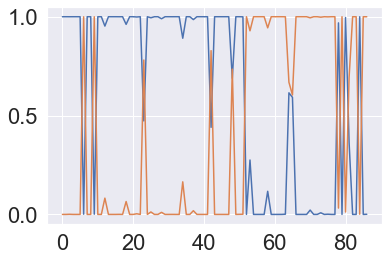

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

0.9692307692307691

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

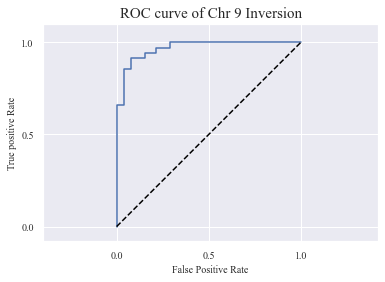

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  0.9692307692307691


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.908


In [67]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.94      0.90      0.92        52
chr_9_inversion       0.86      0.91      0.89        35

      micro avg       0.91      0.91      0.91        87
      macro avg       0.90      0.91      0.91        87
   weighted avg       0.91      0.91      0.91        87



In [68]:
type(performanceReport)

str

In [69]:
confusion

,chr_09,chr_9_inversion
chr_09,47,5
chr_9_inversion,3,32


In [70]:
print('AUC is ', auc_value)

AUC is  0.9692307692307691


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()